# Data throughout comparison betwene C code and Python for CAT Vehicle CAN Data

In [29]:
from strym import strymread
import strym
import matplotlib.pyplot as plt
import numpy as np

msgsOfInterest = [180,37,384]

## Reading data captured using C Code

**This 

In [32]:
cdata = '/Users/sprinkle/work/data/cyverse/rahulbhadani/JmscslgroupData/PandaData/2020_03_09/2020-03-09-18-18-29_CAN_Messages.csv'
import pandas as pd

In [33]:
cframe = pd.read_csv(cdata)

In [34]:
cframe

,Time,Buffer,Bus,MessageID,Message,MessageLength
0,1.583803e+09,0000205f0800b7240000000000000000,0,761,0000000000000000,8
1,1.583803e+09,0000807f080058410000000000000048,0,1020,0000000000000048,8
2,1.583803e+09,0000808d08008a615a12000000000000,0,1132,5a12000000000000,8
3,1.583803e+09,000060c70800b3911600010300000000,0,1595,1600010300000000,8
4,1.583803e+09,0000807f0800fba20000000000000030,0,1020,0000000000000030,8
...,...,...,...,...,...,...
1953545,1.583804e+09,000080160800082f0000000099000055,0,180,0000000099000055,8
1953546,1.583804e+09,0000a0040800832f0fb6000040000032,0,37,0fb6000040000032,8
1953547,1.583804e+09,000000450400fd2f0000002e00ffffff,0,552,0000002e,4
1953548,1.583804e+09,0000401704005230020120e1ffffffff,0,186,020120e1,4


In [35]:
csorted = cframe.sort_values(by='MessageID')

In [36]:
csorted

,Time,Buffer,Bus,MessageID,Message,MessageLength
1391171,1.583804e+09,000080040800bd820201020742088002,0,36,0201020742088002,8
1036758,1.583804e+09,000080040800f37f020101fc41ff80ec,0,36,020101fc41ff80ec,8
371350,1.583803e+09,000080040800a23901ff01ed41fb80d6,0,36,01ff01ed41fb80d6,8
43589,1.583803e+09,000080040800ee6d01a5020541bd8057,0,36,01a5020541bd8057,8
679295,1.583803e+09,0000800408007d8801ff021442018005,0,36,01ff021442018005,8
...,...,...,...,...,...,...
764597,1.583803e+09,000080fb0800a00206520d0000010200,0,2012,06520d0000010200,8
760898,1.583803e+09,000080fb0800ffa40652020000010200,0,2012,0652020000010200,8
756768,1.583803e+09,000080fb080084062101400000000000,0,2012,2101400000000000,8
753190,1.583803e+09,000080fb08004a272101600000000000,0,2012,2101600000000000,8


In [37]:
cnt = csorted['MessageID'].value_counts()

In [38]:
cnt = cnt.sort_index(ascending=True)

In [39]:
cnt

36      39423
37      78857
170     78857
180     39429
186     26286
        ...  
1990       36
1994       20
1998       36
2004       52
2012       52
Name: MessageID, Length: 209, dtype: int64

## Plot the count of messages

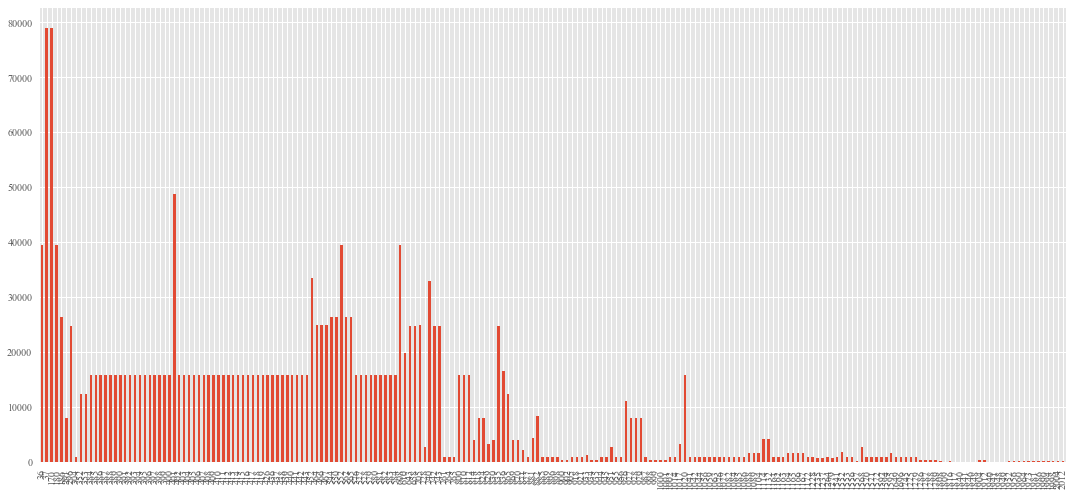

In [40]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=5.0)
cnt.plot(kind='bar', ax=ax)
ax.tick_params(axis="x")
ax.tick_params(axis="y")

## Frequency Analysis of messages

15771
Analyzing Timestamp and Data Rate of 180
Interquartile Range of Rate for 180 is 0.4930667595448597 


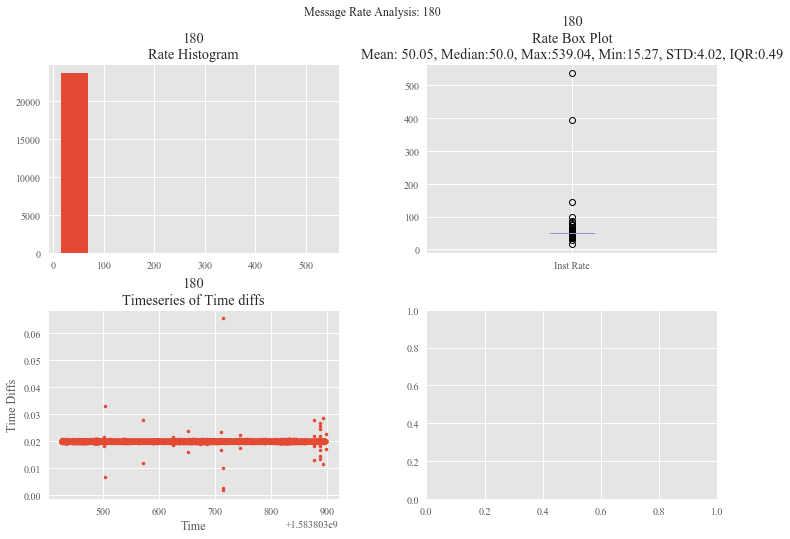

31542
Analyzing Timestamp and Data Rate of 37
Interquartile Range of Rate for 37 is 2.6941013143838575 


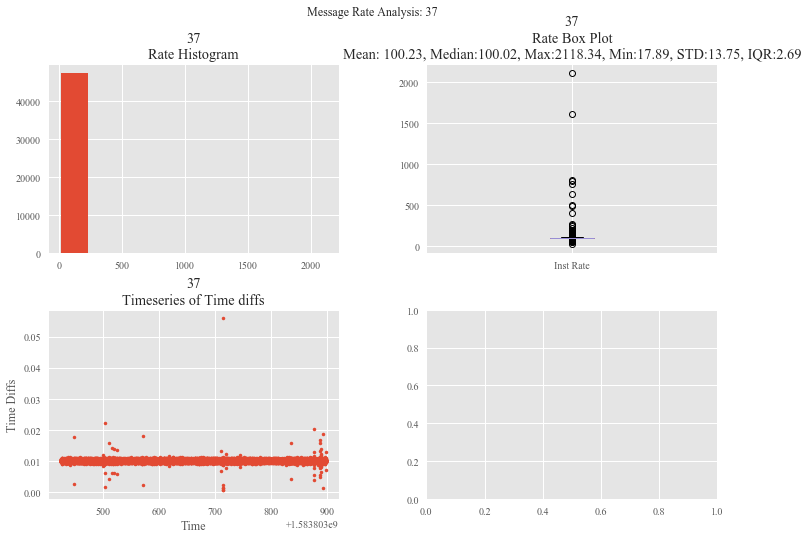

6308
Analyzing Timestamp and Data Rate of 384
Interquartile Range of Rate for 384 is 0.12435701215000705 


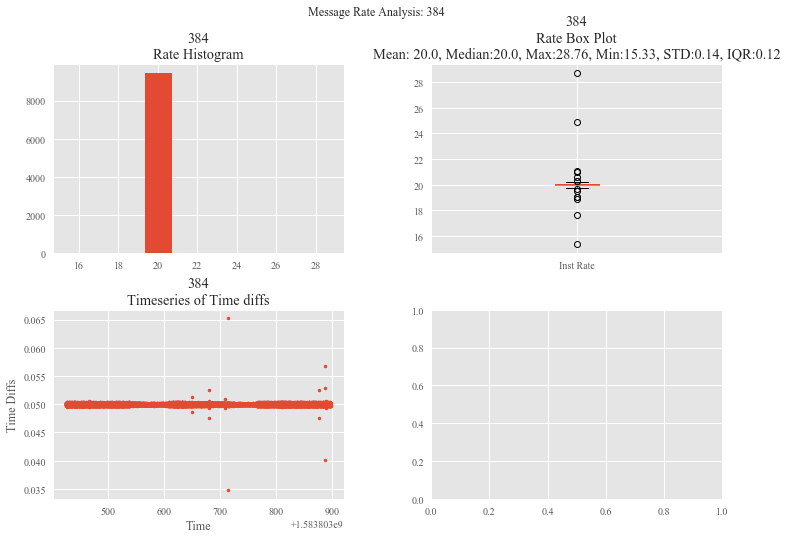

In [41]:
for index in msgsOfInterest: #cnt.index:
    m_data = cframe[cframe['MessageID'] == index ]
    n_msg = m_data.shape[0]
    percent = 40
    n_msg_to_trunc = (n_msg*percent)/100
    n_msg_to_trunc= int(n_msg_to_trunc)
    print(n_msg_to_trunc)
    m_data = m_data[n_msg_to_trunc:]

    strym.ranalyze(m_data, title =str(index))

## Reading data captured using Py Code

In [42]:
pydata = '/Users/sprinkle/work/data/cyverse/rahulbhadani/JmscslgroupData/PandaData/2020_03_06/2020-03-06-11-51-50-261530__CAN_Messages.csv'
pyframe = pd.read_csv(pydata)

In [14]:
pysorted = pyframe.sort_values(by='MessageID')
pycnt = pysorted['MessageID'].value_counts()
pycnt = pycnt.sort_index(ascending=True)


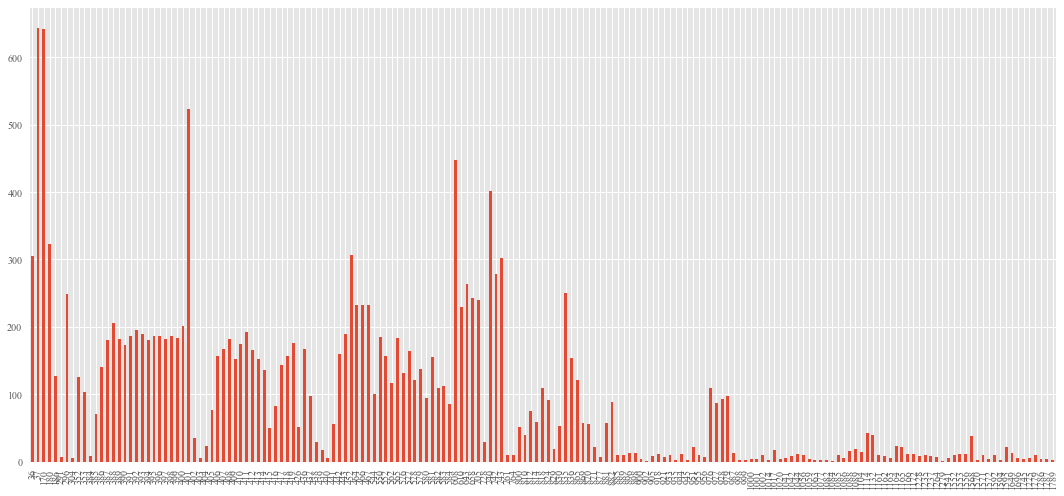

In [15]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=5.0)
pycnt.plot(kind='bar', ax=ax)
ax.tick_params(axis="x")
ax.tick_params(axis="y")

Analyzing Timestamp and Data Rate of 180
Interquartile Range of Rate for 180 is 25.034645805340013 


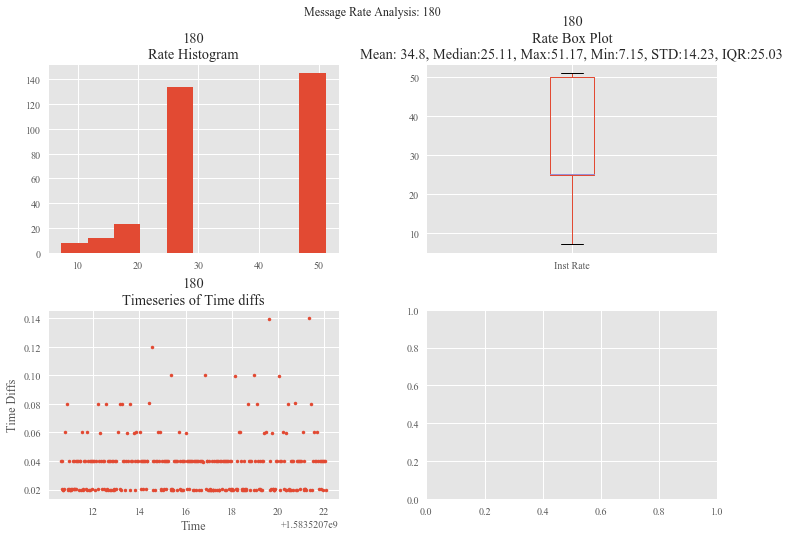

Analyzing Timestamp and Data Rate of 37
Interquartile Range of Rate for 37 is 50.930100799152754 


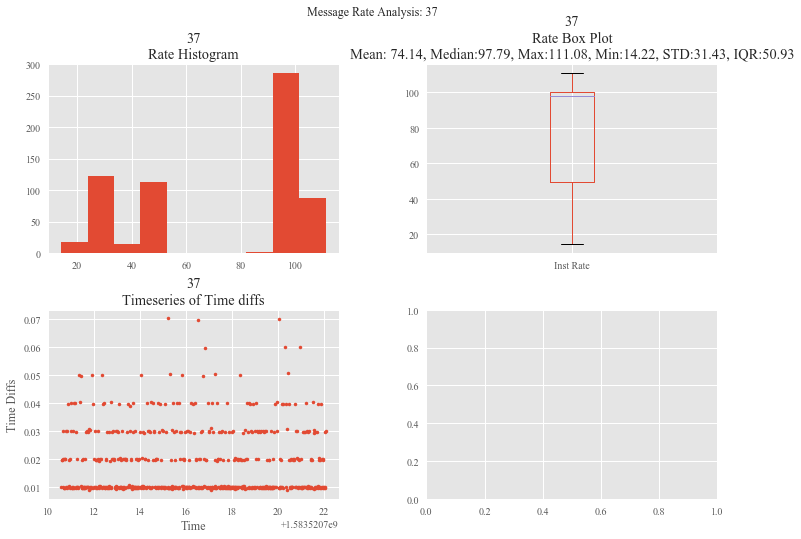

Analyzing Timestamp and Data Rate of 384
Interquartile Range of Rate for 384 is 2.7788708744077715 


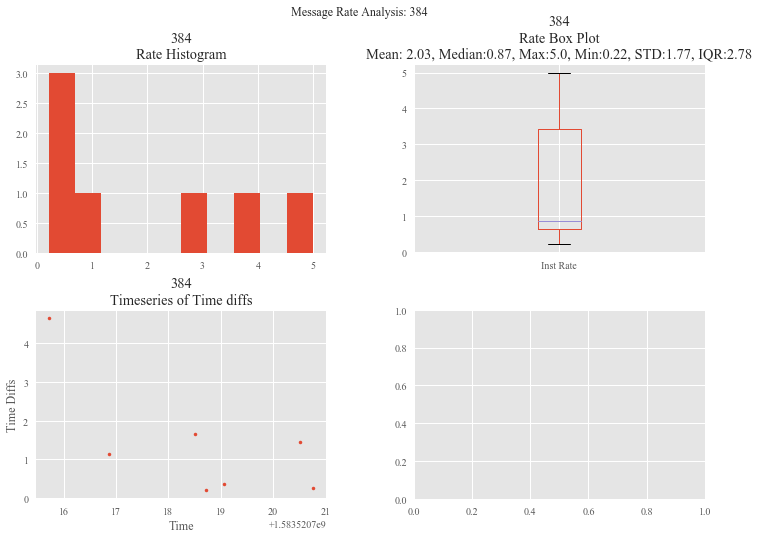

In [25]:
for index in msgsOfInterest: #pycnt.index:
    m_data = pyframe[pyframe['MessageID'] == index ]
    strym.ranalyze(m_data, title =str(index))

## Side by side comparison by data throughput    
    

Analyzing Timestamp and Data Rate of MessageID 180 Using Python
Interquartile Range of Rate for MessageID 180 Using Python is 25.034645805340013 


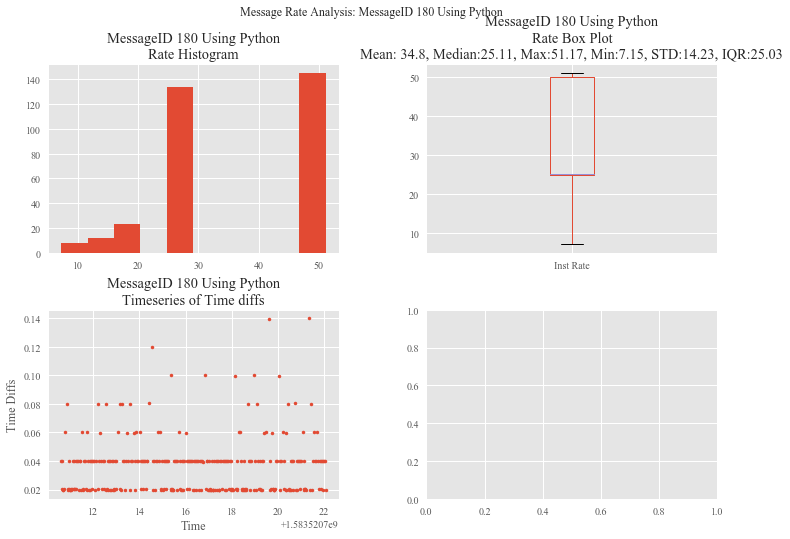

232
Analyzing Timestamp and Data Rate of MessageID 180 Using C
Interquartile Range of Rate for MessageID 180 Using C is 0.49257046694835793 


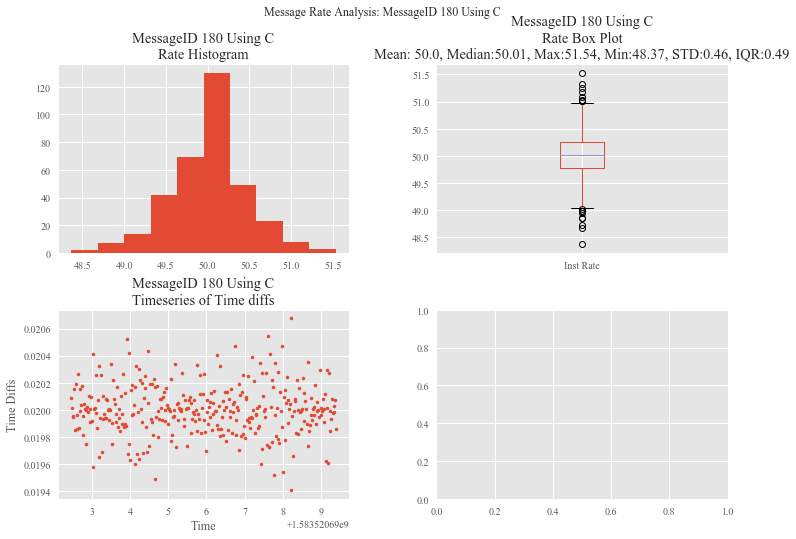

Analyzing Timestamp and Data Rate of MessageID 37 Using Python
Interquartile Range of Rate for MessageID 37 Using Python is 50.930100799152754 


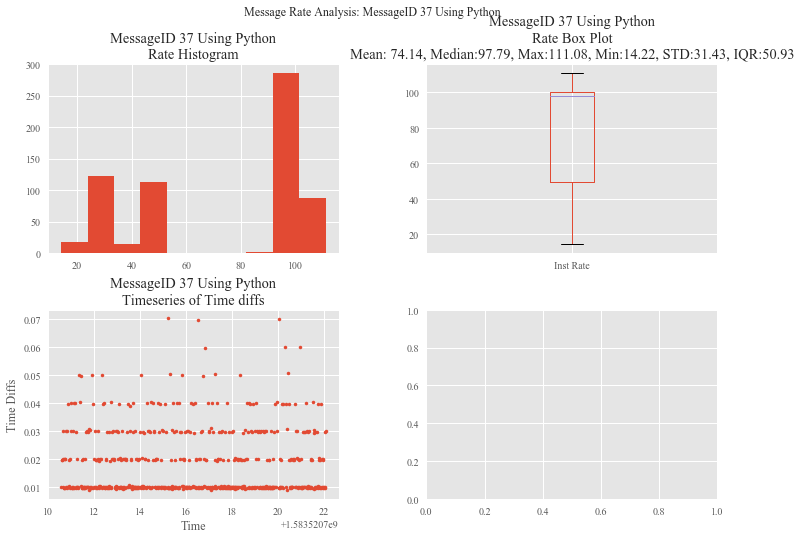

464
Analyzing Timestamp and Data Rate of MessageID 37 Using C
Interquartile Range of Rate for MessageID 37 Using C is 2.6673643365464557 


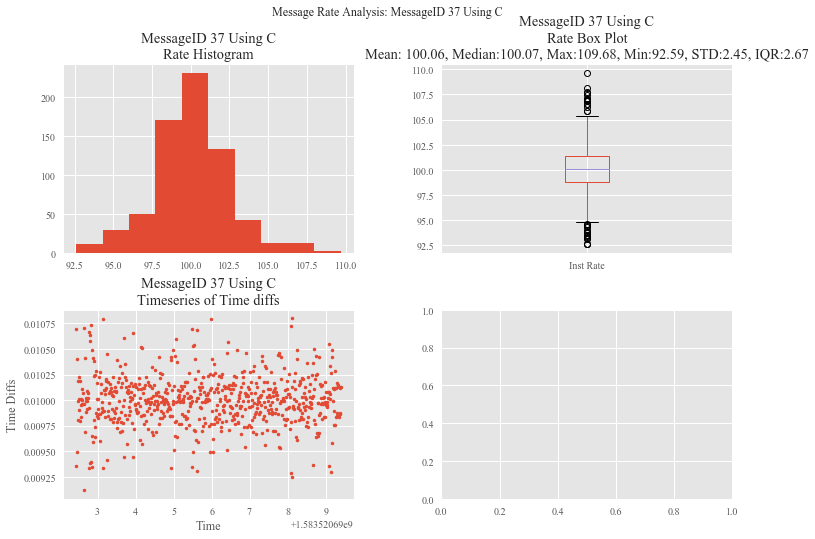

Analyzing Timestamp and Data Rate of MessageID 384 Using Python
Interquartile Range of Rate for MessageID 384 Using Python is 2.7788708744077715 


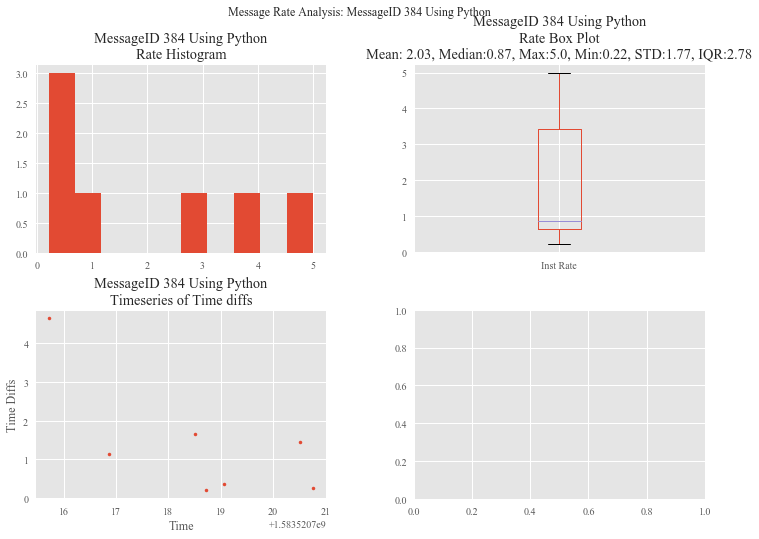

92
Analyzing Timestamp and Data Rate of MessageID 384 Using C
Interquartile Range of Rate for MessageID 384 Using C is 0.18182774077709496 


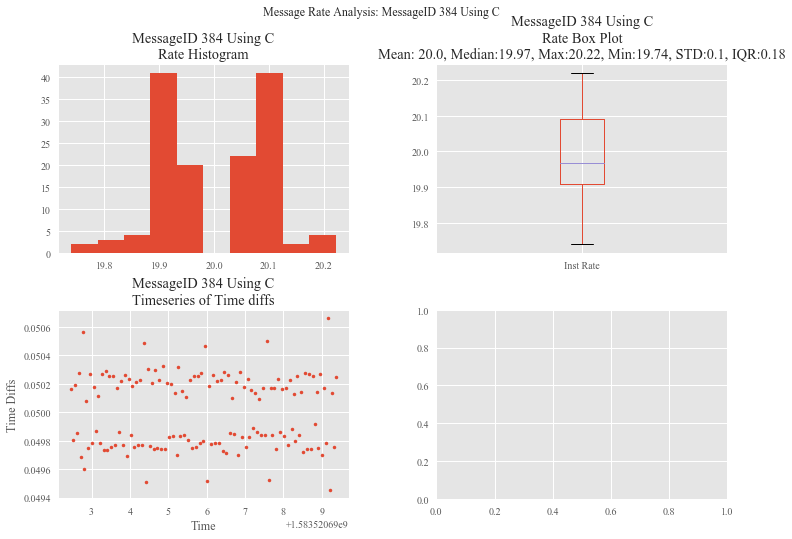

In [26]:
for index in msgsOfInterest:
    m_data = pyframe[pyframe['MessageID'] == index ]
    strym.ranalyze(m_data, title ="MessageID " + str(index) + " Using Python")
    
    n_data = cframe[cframe['MessageID'] == index ]
    n_data = cframe[cframe['MessageID'] == index ]
    n_msg = n_data.shape[0]
    percent = 40
    n_msg_to_trunc = (n_msg*percent)/100
    n_msg_to_trunc= int(n_msg_to_trunc)
    print(n_msg_to_trunc)
    n_data = n_data[n_msg_to_trunc:]
    strym.ranalyze(n_data, title ="MessageID " + str(index) + " Using C")